# ch.3　Python을 이용한 데이터 분석

## 3.5 표본통계량 성질

### 3.5.1 시행
시행: 1회의 조사를 수행한 것.   
시행횟수: 시행을 반복한 횟수

### 3.5.2 표본분포

표본분포: 표본의 통계량이 따르는 확률분포

표본 조사라는건 보통 1회 밖에 할 수 없다. 샘플의 수를 10개로 하던 100개로 하던 1회의 조사로 얻을 수 있는 표본의 수는 1개 뿐이다.

### 3.5.3 라이브러리 import

In [2]:
# 라이브러리 import~
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프에 필요한 라이브러리~
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 소수자리 3자리~ 근데 왜 이거 해도 계속 3자리가 안되는걸까~
%precision 3
# 그래프를 주피터 노트북에 그리려면 필요하답니다~
%matplotlib inline

In [3]:
# 모집단 설정: 평균4, 표준편차 0.8인 정규분포를 모집단으로 설정
population = stats.norm(loc = 4, scale = 0.8)

### 3.5.4 표본평균을 여러번 계산하기

In [4]:
# 길이가 10000개인 배열 만들기
sample_mean_array = np.zeros(10000)
sample_mean_array

array([0., 0., 0., ..., 0., 0., 0.])

In [5]:
# 10000개의 표본평균 저장하기
np.random.seed(1) # 난수 시드 설정
for i in range(0, 10000): #for문 사용해 10000회 시행
    sample = population.rvs(size = 10) # 3.4.9의 stats.norm.rvs 요고 기억 나시쥬?
    sample_mean_array[i] = np.mean(sample) #표본들의 평균을 배열하기

In [6]:
sample_mean_array
#시드 설정을 해주었기에 아무리 run을 돌려도 값이 변하지 않는다.

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

### 3.5.5 표본평균의 평균값은 모평균에 가깝다.

In [18]:
# 표본평균의 평균값 계산하기
np.mean(sample_mean_array)

4.004202422791747

In [20]:
# 표본평균의 표준편차
np.std(sample_mean_array, ddof = 1)

0.2513580850860402

<AxesSubplot:ylabel='Count'>

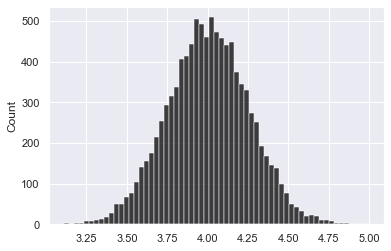

In [22]:
# 표본평균의 히스토그램
sns.histplot(sample_mean_array, color = 'black')

### 3.5.6 샘플사이즈가 크면 표본평균은 모평균에 가까워진다.

In [23]:
# 10~1000010까지 100단위로 커지는 배열 만들기
size_array =  np.arange(
    start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [24]:
# 표본평균을 저장할 배열만들기
sample_mean_array_size = np.zeros(len(size_array))

In [26]:
# 표본평균 저장하기
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

Text(0, 0.5, 'sample mean')

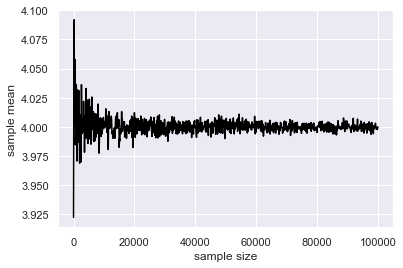

In [27]:
#가로축 샘플사이즈, 세로축 표본평균인 그래프 그리기
plt.plot(size_array, sample_mean_array_size, 
         color = 'black')
plt.xlabel("sample size")
plt.ylabel("sample mean")

샘플사이즈가 커질수록 표본평균이 모평균 4에 가까워지는 것을 볼 수 있다.

### 3.5.7 표본평균을 몇번이고 계산하는 함수 만들기

In [32]:
# 표본평균을 몇번이고 계산을 반복하는 함수를 만들어보자.
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size = size)
        sample_mean_array[i] = np.mean(sample)
    return(sample_mean_array)

In [33]:
# 데이터 10개를 선택해서 시행을 10000회 해보자.
np.random.seed(1)
np.mean(calc_sample_mean(size = 10, n_trial = 10000))

4.004202422791747

### 3.5.8 샘플 사이즈를 바꿨을 때 표본평균의 분산

In [34]:
np.random.seed(1)
# 샘플사이즈 10
size_10 = calc_sample_mean(size = 10, n_trial = 10000)
size_10_df = pd.DataFrame({
    "sample_mean":size_10,
    "size"       :np.tile("size 10", 10000)
})
# 샘플사이즈 20
size_20 = calc_sample_mean(size = 20, n_trial = 10000)
size_20_df = pd.DataFrame({
    "sample_mean":size_20,
    "size"       :np.tile("size 20", 10000)
})
# 샘플사이즈 30
size_30 = calc_sample_mean(size = 30, n_trial = 10000)
size_30_df = pd.DataFrame({
    "sample_mean":size_30,
    "size"       :np.tile("size 30", 10000)
})

# 종합
sim_result = pd.concat(
    [size_10_df, size_20_df, size_30_df])

# 결과표시
print(sim_result.head())

   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10


<AxesSubplot:xlabel='size', ylabel='sample_mean'>

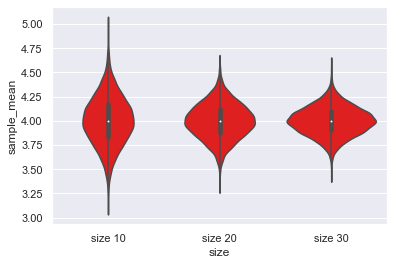

In [36]:
#샘플 사이즈별로 바이올린 플룻 그리기
sns.violinplot(x = "size", y = "sample_mean", 
               data = sim_result, color = 'red')

샘플 사이즈가 커질수록 표본평균이 흩어지는 정도가 작아져서 모평균에 가깝게 모이는 것을 알 수 있다.  
바이올린 플룻이 상자수염그림보다 좋은 이유가 여기서 나왔다!  
값이 어디에 얼마나 모여있는지도 표현이 됐던 것이다..!

### 3.5.9 표본평균의 표준편차는 모집단보다 작다

In [39]:
# 2~100까지 2씩 차이나는 샘플 배열 만들기
size_array =  np.arange(
    start = 2, stop = 102, step = 2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [40]:
# 표준편차 저장할 배열을 만들어요오
sample_mean_std_array = np.zeros(len(size_array))

In [41]:
# 표준편차를 쭉쭉쭉 시행하는 시뮬레이션을 100회 시행합시다아아
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size =size_array[i], 
                                   n_trial = 100)
    sample_mean_std_array[i] = np.std(sample_mean, 
                                      ddof = 1)

Text(0, 0.5, 'mean_std value')

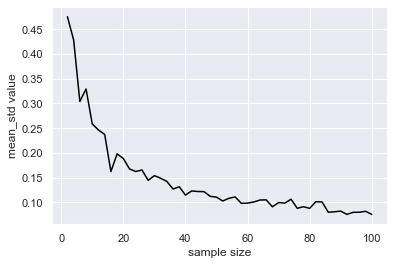

In [43]:
#가로축이 샘플 사이즈, 세로축이 표본평균의 표준편차
plt.plot(size_array, sample_mean_std_array, 
         color = 'black')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

표본평균의 샘플 사이즈가 커질수록 표준편차가 작아지는 것을 볼 수 있죠~?   

~그만큼 흩어짐이 적은 신뢰할 수 있는 표본평균을 만드실 수 있다는거지~~

### 3.5.10 표준오차(Standard Error,SE)

표준오차=표준편차/샘플사이즈의 제곱근

In [45]:
# 표본 평균의 표준편차 구하기
standard_error = 0.8 / np.sqrt(size_array)
standard_error

# size_array는 '2~100까지 2씩 차이나는 샘플 배열 만들기'에서 나온 것.

array([0.566, 0.4  , 0.327, 0.283, 0.253, 0.231, 0.214, 0.2  , 0.189,
       0.179, 0.171, 0.163, 0.157, 0.151, 0.146, 0.141, 0.137, 0.133,
       0.13 , 0.126, 0.123, 0.121, 0.118, 0.115, 0.113, 0.111, 0.109,
       0.107, 0.105, 0.103, 0.102, 0.1  , 0.098, 0.097, 0.096, 0.094,
       0.093, 0.092, 0.091, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084,
       0.083, 0.083, 0.082, 0.081, 0.08 ])

Text(0, 0.5, 'mean_std value')

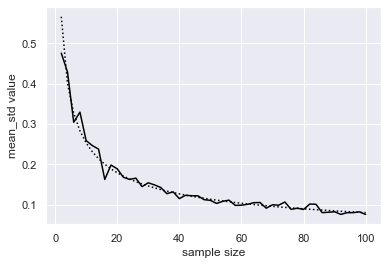

In [46]:
#표준오차는 점선그래프, 표준편차는 실선 그래프
plt.plot(size_array, sample_mean_std_array, 
         color = 'black')
plt.plot(size_array, standard_error, 
         color = 'black', linestyle = 'dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

표본평균의 표준편차 시뮬레이션과 표준오차의 값이 거의 일치한다.

### 3.5.11 표준오차의 직관적인 설명

표본평균의 표준편차는 모집단의 표준편차보다도 작다.  
교재가 설명하는건 난 잘 모르겠고, 그냥 표본들의 평균들을 모아서 표준편차를 낸다면 그만큼 극단적인 데이터들이 배제되기 때문이라고 생각한다.

### 3.5.12 표본분산의 평균값은 모분산과 차이가 있다.

In [47]:
# 표본분산 저장할 변수 만들기
sample_var_array = np.zeros(10000)

In [50]:
# 10개 사이즈로 10000회 시행
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    sample_var_array[i] = np.var(sample, ddof = 0)

In [51]:
# 표본의 분산들의 평균을 구합시다.
np.mean(sample_var_array)

0.5746886877332101

표본평균을 구하고 표준편차를 구하면, 오히려 값이 더 모평균에 가까워져서 모집단의 표준편차보다도 작았는데,  
이 경우에도 모분산의 0.64에 비해 과소평가되는 것을 볼 수 있다.  
하지만 이 경우엔 더 정확해서가 아니라 표본 분산들의 값이 편향되서 그런것이다.

### 3.5.13 불편분산을 사용하면 편향이 사라진다.

In [53]:
# 불편분산을 저장할 배열(변수)
unbias_var_array = np.zeros(10000)
# 데이터를 10개 골라서 불편분산을 구하는 시행을 10000번 반복
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    unbias_var_array[i] = np.var(sample, ddof = 1)
# 不偏分散の平均値
np.mean(unbias_var_array)

0.6385429863702334

### 3.5.14 샘플사이즈가 크면 불편분산은 모분산에 가까워진다.

In [57]:
# 샘플 사이즈 준비~
size_array =  np.arange(
    start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [58]:
# 불편분산 저장할 배열(변수)만들기
unbias_var_array_size = np.zeros(len(size_array))

In [61]:
# 불편분산 구하는 시뮬레이션 돌리기~!
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    unbias_var_array_size[i] = np.var(sample, ddof = 1)

Text(0, 0.5, 'unbias var')

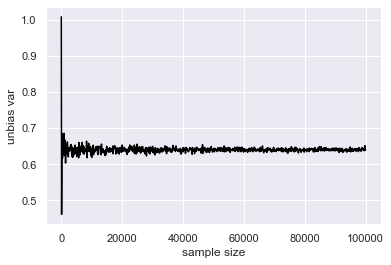

In [62]:
# 가로축 샘플사이즈, 세로축 불편분산
plt.plot(size_array, unbias_var_array_size, color = 'black')
plt.xlabel("sample size")
plt.ylabel("unbias var")

샘플 사이즈가 커질수록 불편분산은 모분산 0.64에 가까워진다.

### 3.5.15 불편성
불편성: 추정량의 기댓값이 진짜 모수가 되는 특성
- 불편성이 있다: 평균을 냈을 때 과대 또는 과소하지 않다. 편향이 없는 추정량이다.

### 3.5.16 일치성
일치성: 샘플사이즈가 커지면 추정량이 진짜 모수에 가까워지는 특성
- 일치성이 있다: 샘플 사이즈가 무한할 때 추정량과 모수가 일치한다는 뜻

### 3.5.17 모수에 대한 좋은 추정량

3.5 절을 통해 우리는 불편분산의 평균값은 모분산과 거의 일치하며, 표본평균의 평균값은 모평균과 거의 일치함을 알게되었다.  
모집단의 분포를 알긴 어렵기 때문에 정규분포로 가정하기 위해선 표본평균의 평균값과 불편분산의 평균값이 필요하며 이 둘은 일치성을 가지고 있다.

### 3.5.18 큰수의 법칙
큰수의 법칙: 표본의 크기가 커지면 표본평균이 모평균에 가까워지는 방법을 표현한 법칙
- 큰수의 약법칙과 큰수의 강법칙이 있는데, 너무 어렵다. 그냥 30명 넘으면 크다고 생각하자.

### 3.5.19 중심극한정리
중심극한정리: 모집단분포가 무엇이든 간에 샘플 사이즈가 커지면 확률변수의 합은 정규분포에 가까워진다.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

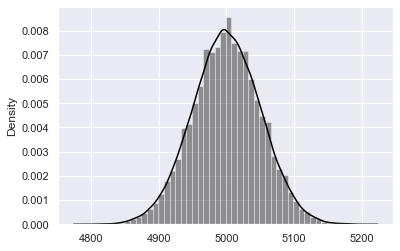

In [66]:
# 샘플사이즈와 시행횟수
n_size  = 10000
n_trial = 50000
# 앞면이면 1, 뒷면이면 0으로 표시
coin = np.array([0,1])
# 앞면이 나온 횟수가 들어갈 배열 생성
count_coin = np.zeros(n_trial)
# 동전을 n_size만큼 던지는 시행을 n_trial번 수행
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = np.sum(
        np.random.choice(coin, size = n_size, 
                         replace = True))
# 히스토그램 그리기
sns.distplot(count_coin, color = 'black')

하지만 모집단의 분포가 항상 정규분포라고 단언하는건 위험하다. 이 경우에도 이항분포이기 때문에 샘플사이즈가 무한히 크다고 해도 모집단이 이항분포인 건 변하지 않는다.  
모집단의 분포를 생각할 때 일반선형모델 등도 고려해야한다.